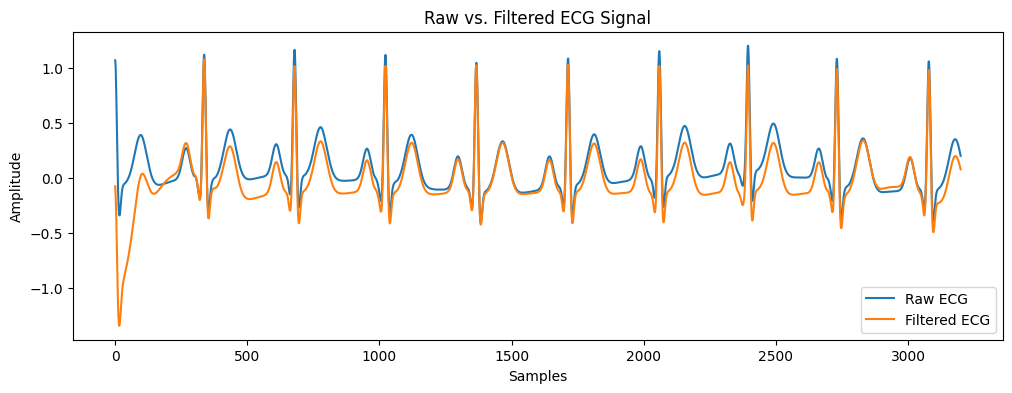

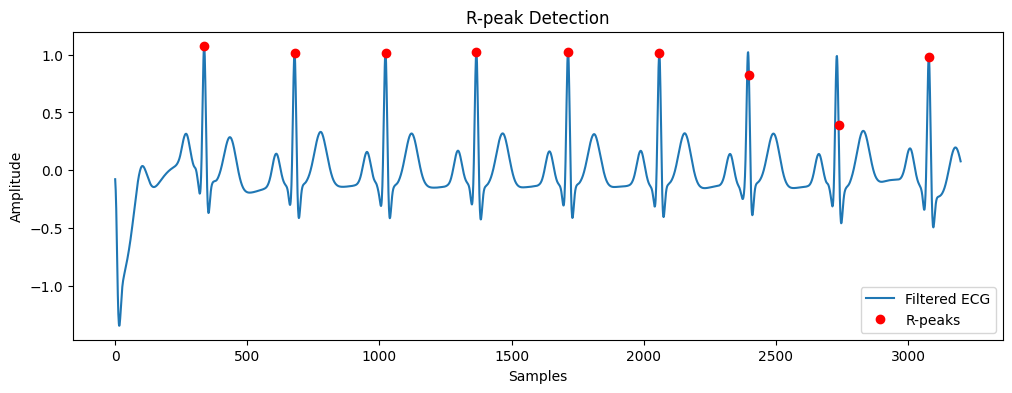

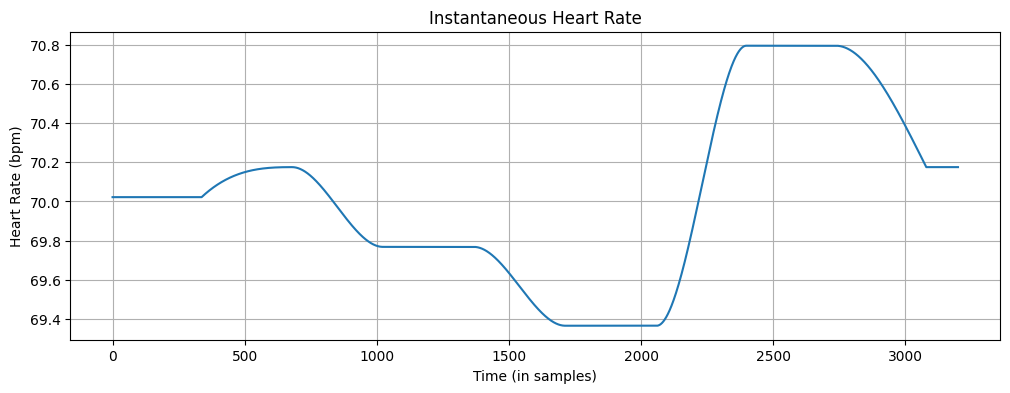

In [3]:
# 1. Load or simulate an ECG signal of a given duration and sampling rate
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import neurokit2 as nk

# Parameters
duration = 8  # seconds
fs = 400      # Hz

# Simulate ECG signal
ecg = nk.ecg_simulate(duration=duration, sampling_rate=fs)

# 2. Apply a bandpass filter with given cutoff frequencies (0.8–38 Hz)
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

filtered_ecg = bandpass_filter(ecg, 0.8, 38, fs)

# Plot raw and filtered ECG
plt.figure(figsize=(12, 4))
plt.plot(ecg, label='Raw ECG')
plt.plot(filtered_ecg, label='Filtered ECG')
plt.title("Raw vs. Filtered ECG Signal")
plt.legend()
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

# 3. Detect R-peaks using neurokit2
signals, info = nk.ecg_process(filtered_ecg, sampling_rate=fs)
r_peaks = info["ECG_R_Peaks"]

# Plot filtered ECG with R-peaks
plt.figure(figsize=(12, 4))
plt.plot(filtered_ecg, label="Filtered ECG")
plt.plot(r_peaks, filtered_ecg[r_peaks], "ro", label="R-peaks")
plt.title("R-peak Detection")
plt.legend()
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

# 4. Compute instantaneous heart rate and visualize it
heart_rate = signals["ECG_Rate"]

plt.figure(figsize=(12, 4))
plt.plot(heart_rate)
plt.title("Instantaneous Heart Rate")
plt.xlabel("Time (in samples)")
plt.ylabel("Heart Rate (bpm)")
plt.grid(True)
plt.show()
